In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [36]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [13, 14, 15]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 50000, 10000, 2*10**(10), 132000, 10000, 5.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(125000*nps_frac)
    ub = int(200000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 132000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
    
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

In [44]:
print(np.transpose(fit_l)[1])
print(np.transpose(fit_l)[4])
print(np.transpose(fit_l2)[1])

print(np.transpose(fit_l)[2])
print(np.transpose(fit_l)[5])
print(np.transpose(fit_l2)[2])

[21380.05901311 21453.61472086 21844.98136403]
[51060.999893   50872.71484467 51725.47498309]
[133468.08830829 133304.17130936 136442.10969377]
[18132.21352757  8903.67360687  4814.88315677]
[15899.78920012  7163.98715422  4716.3802272 ]
[31097.74850708 12545.86262151  7730.68861408]


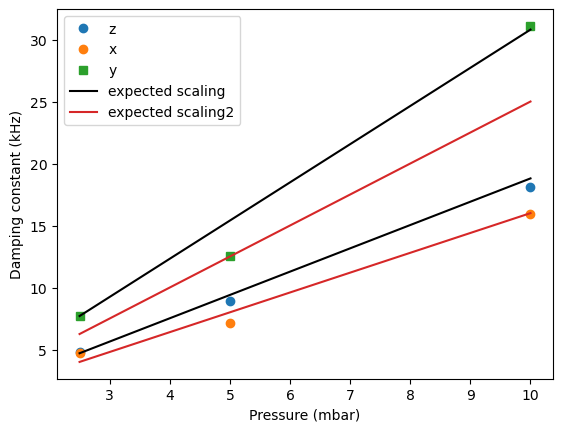

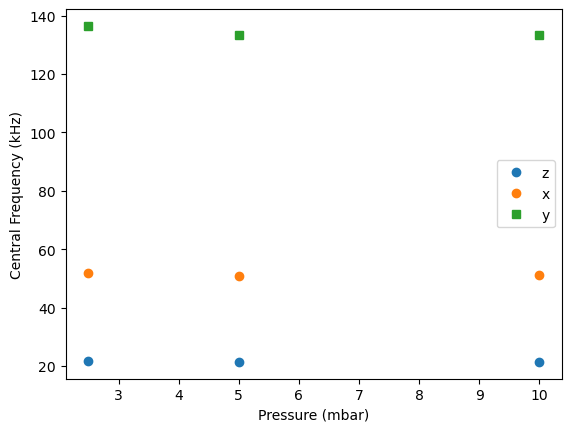

In [35]:
pressure = [10, 5, 2.5]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot([2.5, 10], [4.7, 4.7*10/2.5], 'k')
plt.plot([2.5, 10], [7.7, 7.7*10/2.5], 'k', label = 'expected scaling')

plt.plot([2.5, 5, 10], [8/2, 8, 8*2], 'tab:red')
plt.plot([2.5, 5, 10], [12.5/2, 12.5, 12.5*2], 'tab:red', label = 'expected scaling2')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

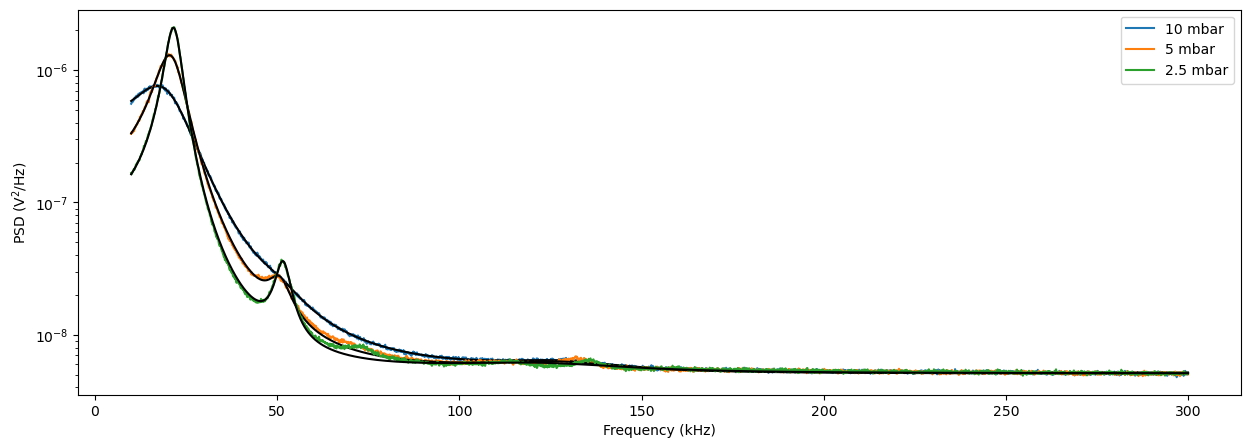

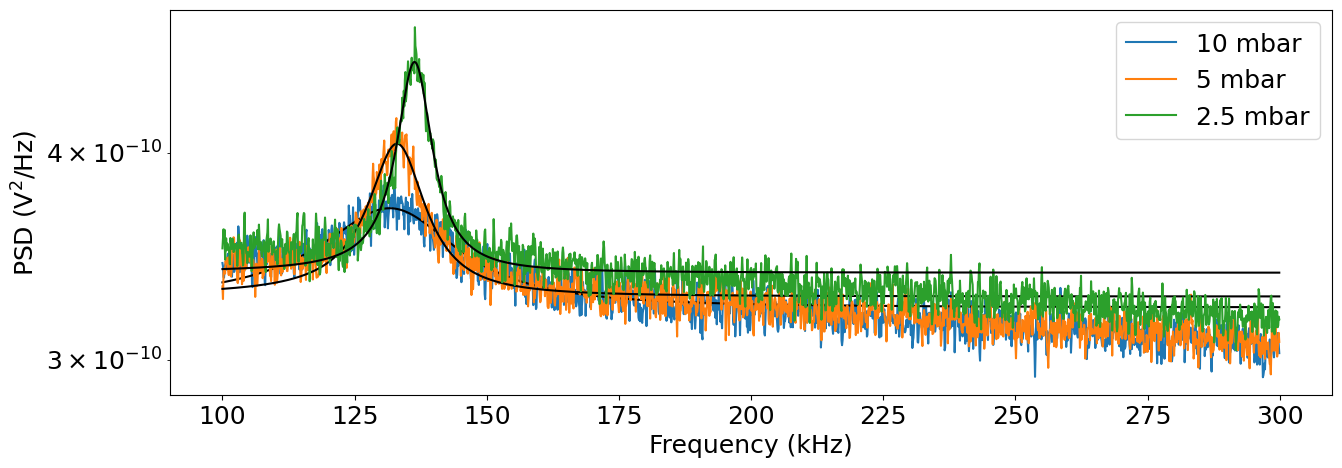

In [84]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [65]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [10, 12]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(400000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    # lb = int(125000*nps_frac)
    # ub = int(200000*nps_frac)
    # fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 132000, 20000, 3*10**(-10)])
    # fitted = au.Linewidth2(PSDx[0], *fit)
    
    # fit_l2.append(fit)
    # fitted_l2.append(fitted)
PSD_freq = PSD[0]

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

In [63]:
file

10

IndexError: index 2 is out of bounds for axis 0 with size 0

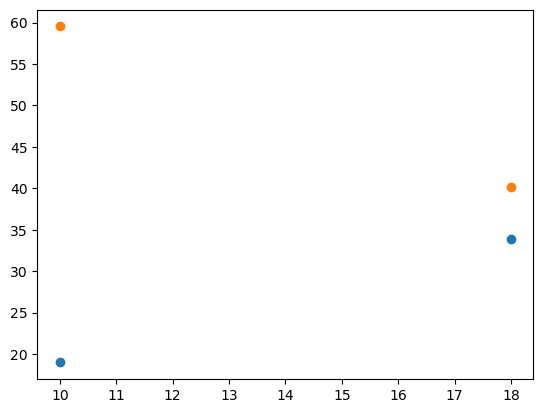

In [25]:
pressure = [18, 10]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

In [68]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(400000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD_freq[lb:ub], PSDs[1][lb:ub], p0 = [1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9)])
fitted1 = au.triple_Linewidth2(PSD_freq, *fit)# 1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9))
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    #plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, fitted1[lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

# plt.figure(figsize = (15, 5))
# plt.tick_params(axis='both', which='both', labelsize=18)
# lb = int(100000*nps_frac)
# ub = int(300000*nps_frac)
# for n, PSD in enumerate(PSDs2):
#     plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
#     plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
# plt.yscale('log')
# plt.legend(fontsize = 18)
# plt.xlabel('Frequency (kHz)', fontsize = 18)
# plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

<Figure size 1500x500 with 0 Axes>

In [75]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [4, 5, 6, 7]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 160000, 10000, 5*10**(-9)])
    fitted = au.double_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(200000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [10*10**8, 220000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
    
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

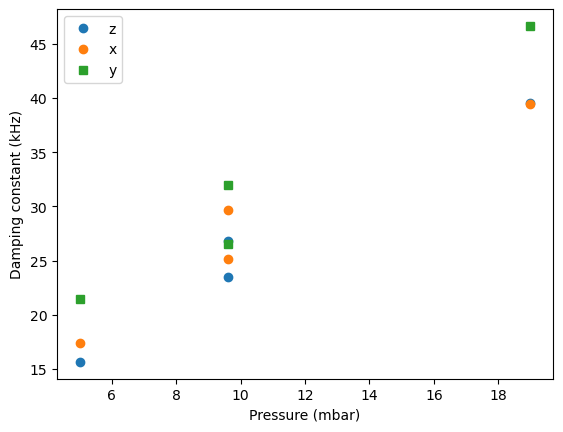

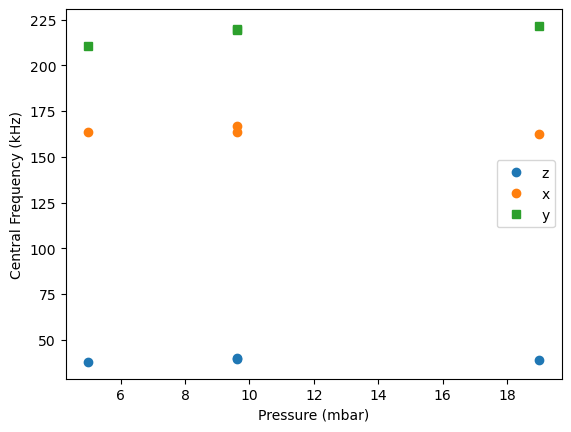

In [76]:
pressure = [19, 9.6, 9.6, 5]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

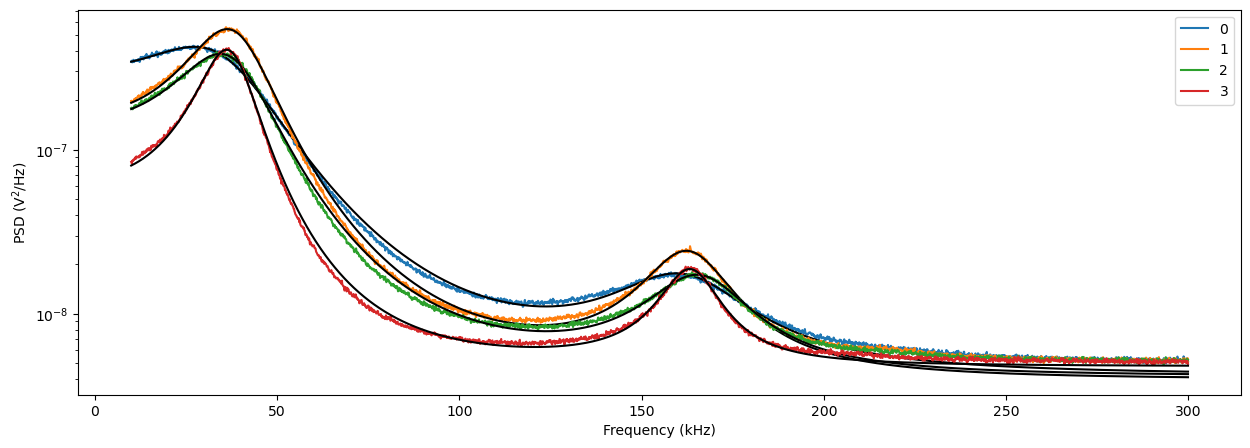

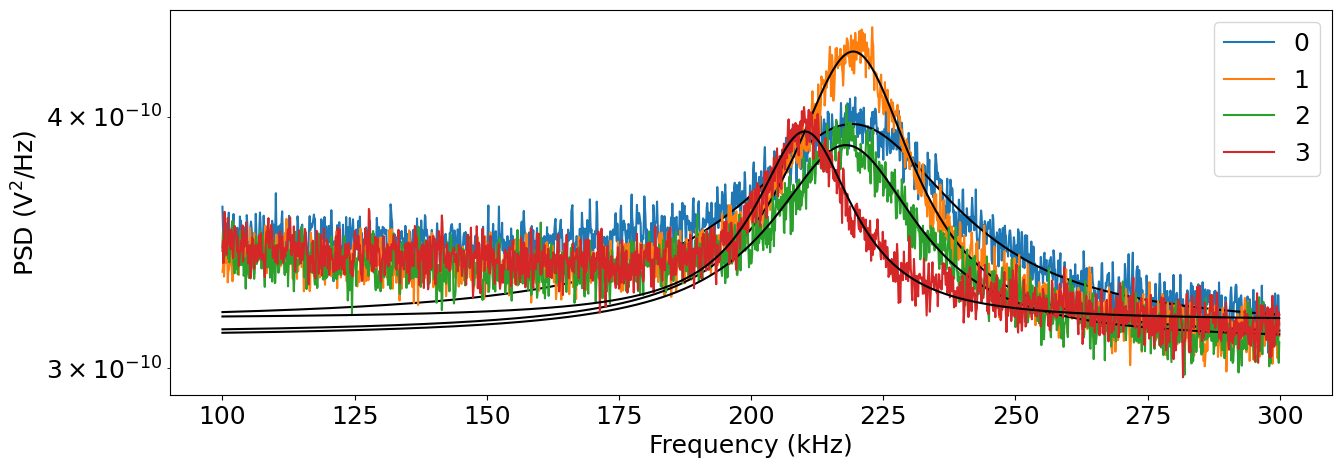

In [77]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [22]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [1, 2, 3]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 170000, 10000, 5*10**(-9)])
    fitted = au.double_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(180000*nps_frac)
    ub = int(250000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [10*10**8, 200000, 30000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
    
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

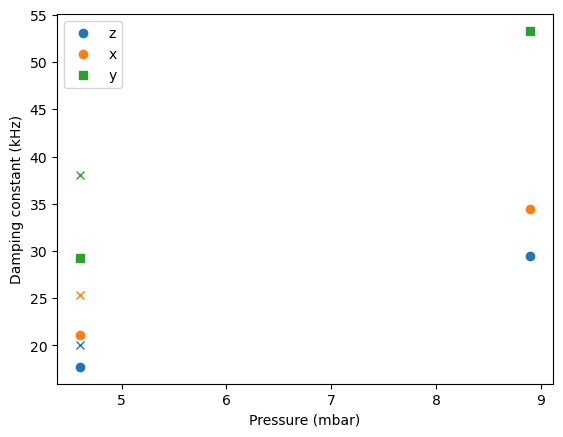

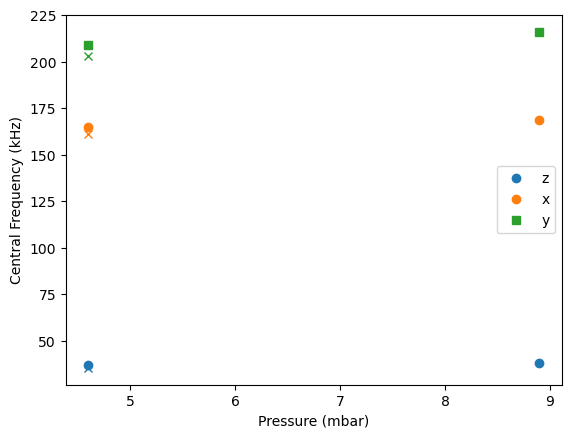

In [28]:
pressure = [8.9, 4.6]
plt.plot(pressure, np.transpose(fit_l)[2][:-1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5][:-1])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2][:-1])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot(pressure[-1], np.transpose(fit_l)[2][-1]/1000, 'x', color = 'tab:blue')
plt.plot(pressure[-1], np.transpose(fit_l)[5][-1]/1000, 'x', color = 'tab:orange')
plt.plot(pressure[-1], np.transpose(fit_l2)[2][-1]/1000, 'x', color = 'tab:green')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1][:-1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4][:-1])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1][:-1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot(pressure[-1], np.transpose(fit_l)[1][-1]/1000, 'x', color = 'tab:blue')
plt.plot(pressure[-1], np.transpose(fit_l)[4][-1]/1000, 'x', color = 'tab:orange')
plt.plot(pressure[-1], np.transpose(fit_l2)[1][-1]/1000, 'x', color = 'tab:green')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

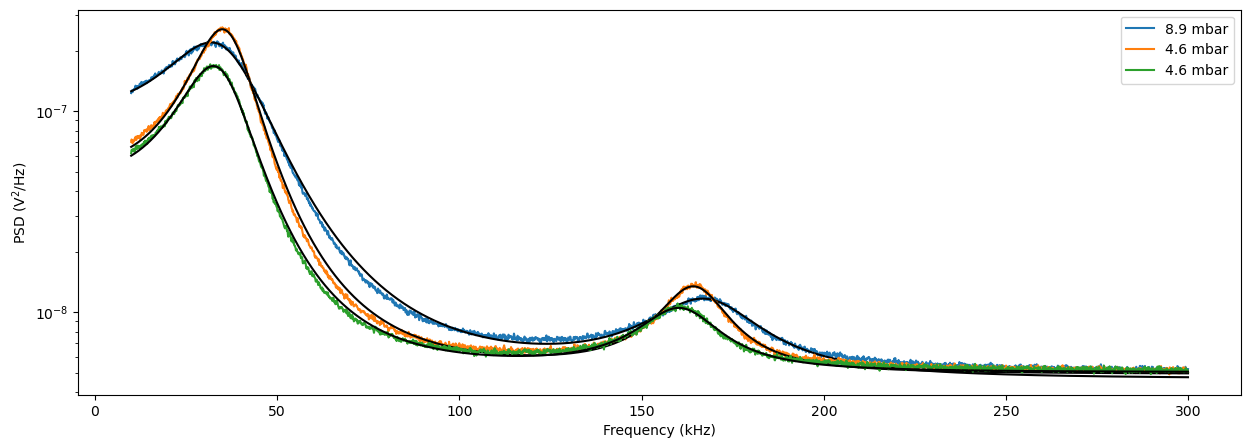

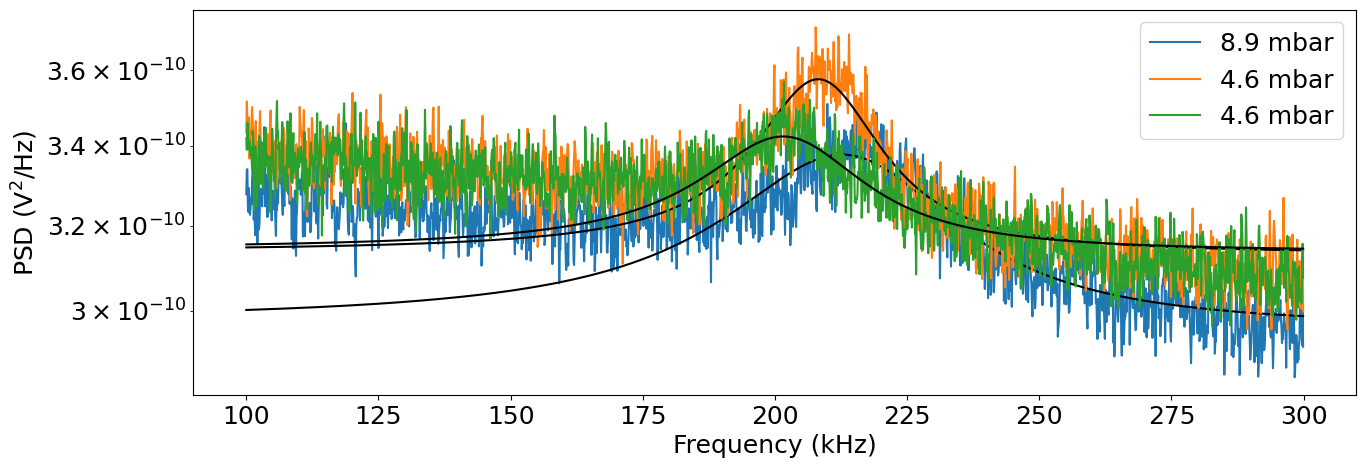

In [29]:
pressure = [8.9, 4.6, 4.6]
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [3]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [22, 23, 24, 25]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    
    
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 160000, 10000, 7.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD[0], *fit)
    
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    
    lb = int(100000*nps_frac)
    ub = int(200000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 152000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
   
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

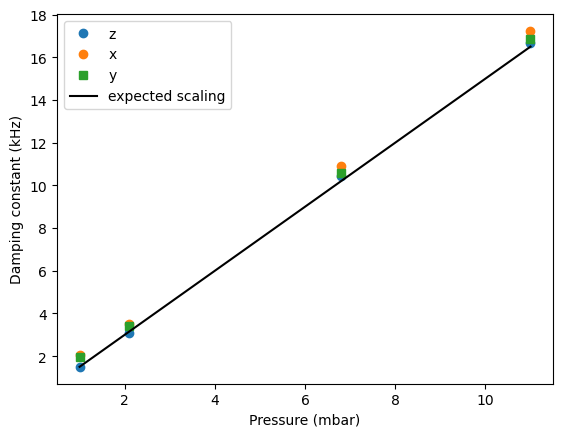

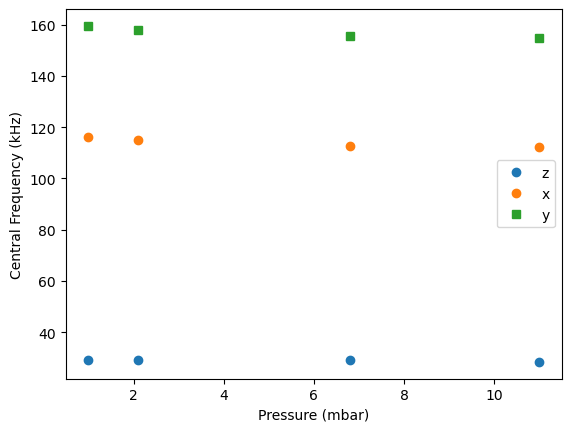

In [4]:
pressure = [1, 2.1, 6.8, 11]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot([1, 11], [1.5, 1.5*11], 'k', label = 'expected scaling')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

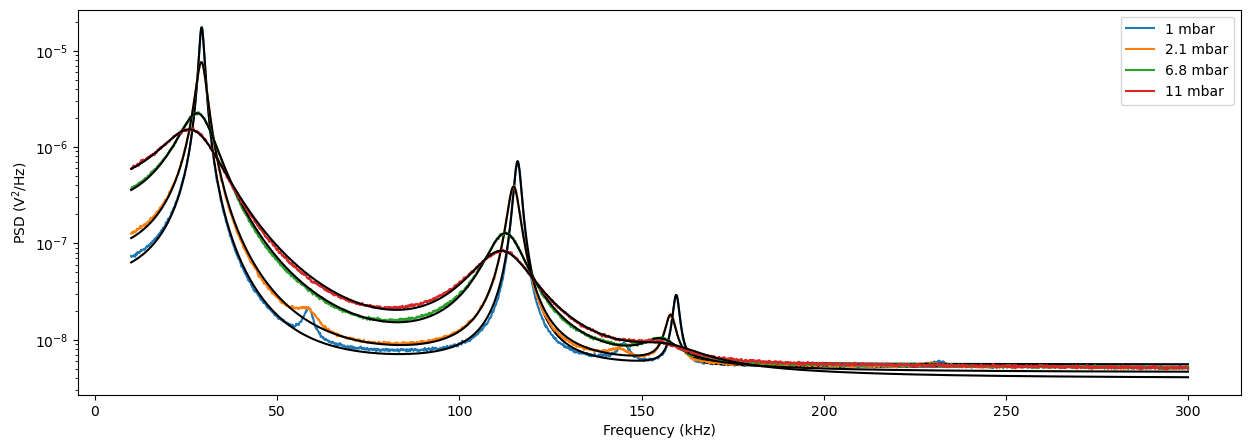

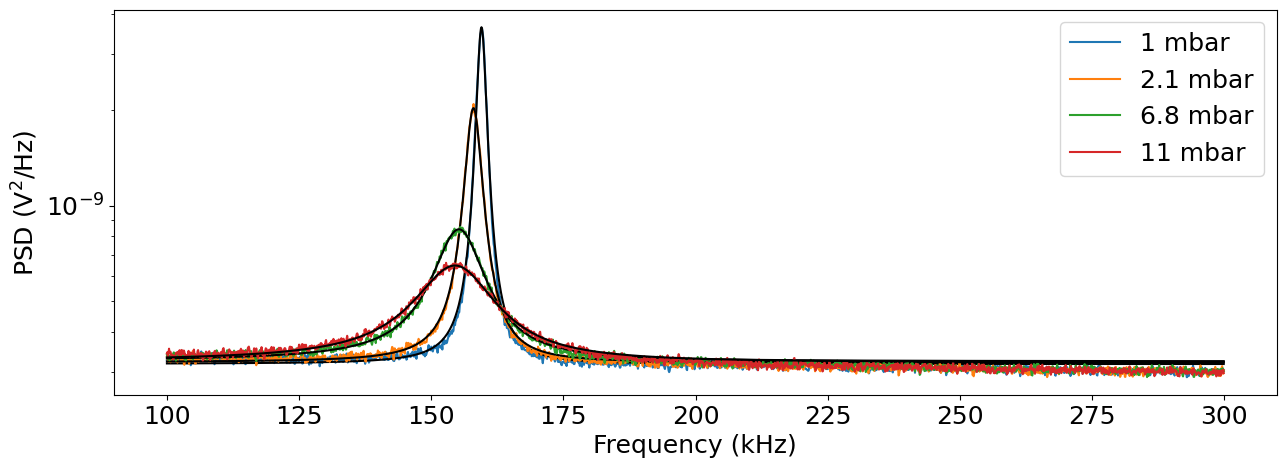

In [5]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

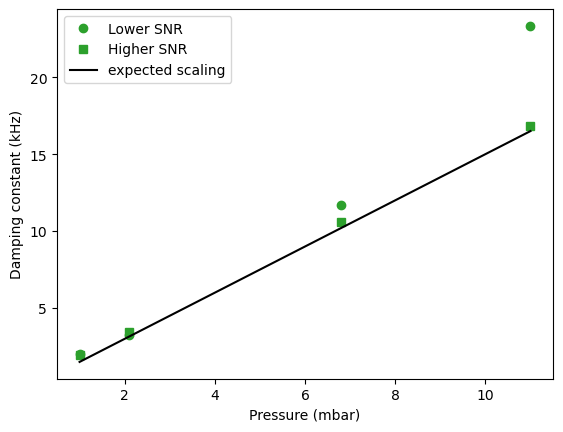

In [15]:
pressure = [1, 2.1, 6.8, 11]
plt.plot(pressure, abs(np.transpose(fit_l)[8])/1000, 'tab:green', marker = 'o', linestyle = 'None', label = 'Lower SNR')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'Higher SNR')
plt.plot([1, 11], [1.5, 1.5*11], 'k', label = 'expected scaling')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

In [43]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [22]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])

    tt = np.transpose(data['A'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])

    tt = np.transpose(data['B'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])

    tt = np.transpose(data['C'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
PSD_freq = PSD[0]

Text(0, 0.5, 'PSD (V$^2$/Hz)')

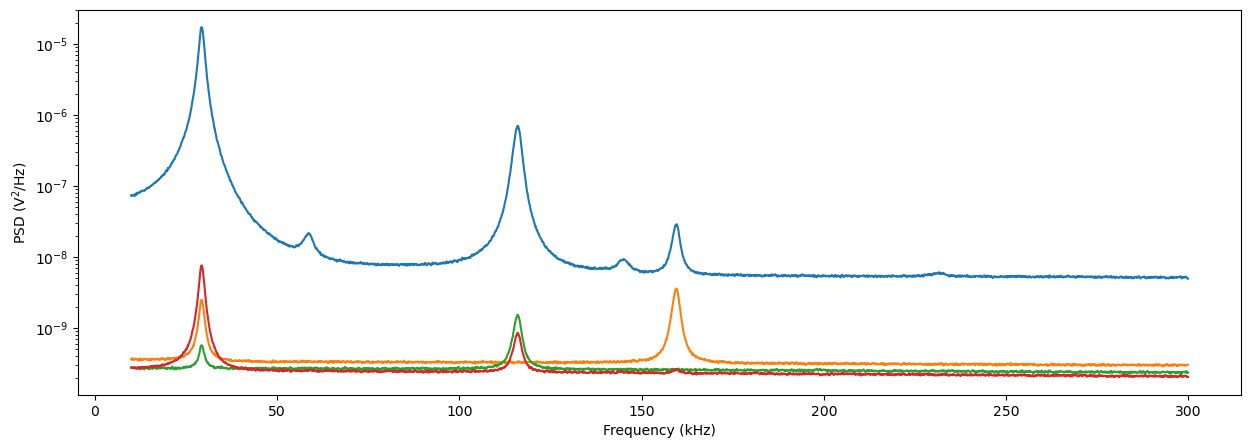

In [44]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub])
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

In [45]:
# First look at blue curve and compare triple vs individual fits

In [46]:
PSD = np.array([PSD_freq, PSDs[0]])

lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 160000, 10000, 7.0*10**(-9)])
fitted = au.triple_Linewidth2(PSD[0], *fit)


lb = int(10000*nps_frac)
ub = int(75000*nps_frac)
fit1, cov1 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 7.0*10**(-9)])
fitted1 = au.Linewidth2(PSD[0], *fit1)
print(fit[:3])
print(fit1[:3])

lb = int(75000*nps_frac)
ub = int(150000*nps_frac)
fit2, cov2 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 125000, 10000, 7.0*10**(-9)])
fitted2 = au.Linewidth2(PSD[0], *fit2)
print(fit[3:6])
print(fit2[:3])

lb = int(150000*nps_frac)
ub = int(200000*nps_frac)
fit3, cov3 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 160000, 10000, 7.0*10**(-9)])
fitted3 = au.Linewidth2(PSD[0], *fit3)
print(fit[3:6])
print(fit3[:3])

[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[3.37096300e+10 2.93563695e+04 1.49525155e+03]
[ 4.05622827e+10  1.16005514e+05 -2.06387868e+03]
[4.07924960e+10 1.16005446e+05 2.06960854e+03]
[ 4.05622827e+10  1.16005514e+05 -2.06387868e+03]
[2.50792286e+09 1.59503410e+05 2.03796893e+03]


Text(0, 0.5, 'PSD (V$^2$/Hz)')

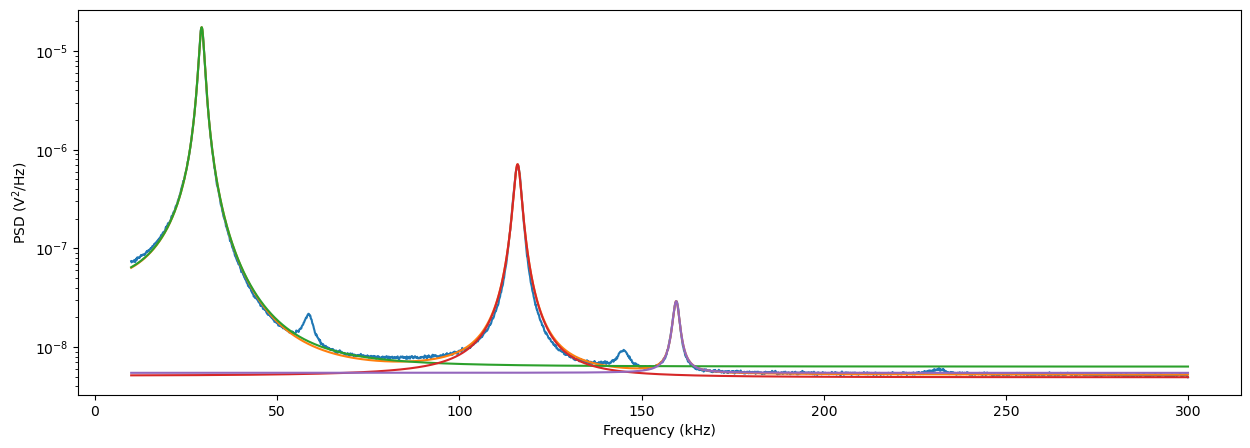

In [47]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
plt.plot(PSD_freq[lb:ub]/1000, PSDs[0][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted[lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted1[lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted2[lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted3[lb:ub])
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

In [48]:
# Looks like individual vs triple barely makes a difference in this case - I checked for the higher pressure case and it is true except for the case of when the spectra overlap

In [49]:
# Now look at how SNR affects measure of linewidth

In [53]:
PSD = np.array([PSD_freq, PSDs[0]])

lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 160000, 10000, 7.0*10**(-9)])
fitted = au.triple_Linewidth2(PSD[0], *fit)

PSD = np.array([PSD_freq, PSDs[1]])
lb = int(10000*nps_frac)
ub = int(50000*nps_frac)
fit1, cov1 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 25000, 10000, 7.0*10**(-10)])
fitted1 = au.Linewidth2(PSD[0], *fit1)
print(fit[:3])
print(fit1[:3])

PSD = np.array([PSD_freq, PSDs[2]])
lb = int(10000*nps_frac)
ub = int(50000*nps_frac)
fit2, cov2 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 25000, 10000, 7.0*10**(-10)])
fitted2 = au.Linewidth2(PSD[0], *fit2)
print(fit[:3])
print(fit2[:3])

PSD = np.array([PSD_freq, PSDs[3]])
lb = int(10000*nps_frac)
ub = int(50000*nps_frac)
fit3, cov3 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 25000, 10000, 7.0*10**(-10)])
fitted3 = au.Linewidth2(PSD[0], *fit3)
print(fit[:3])
print(fit3[:3])

[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[4.25425315e+06 2.93555061e+04 1.50695165e+03]
[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[577220.94010466  29369.97221637   1486.11125362]
[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[1.43213202e+07 2.93606269e+04 1.49545908e+03]


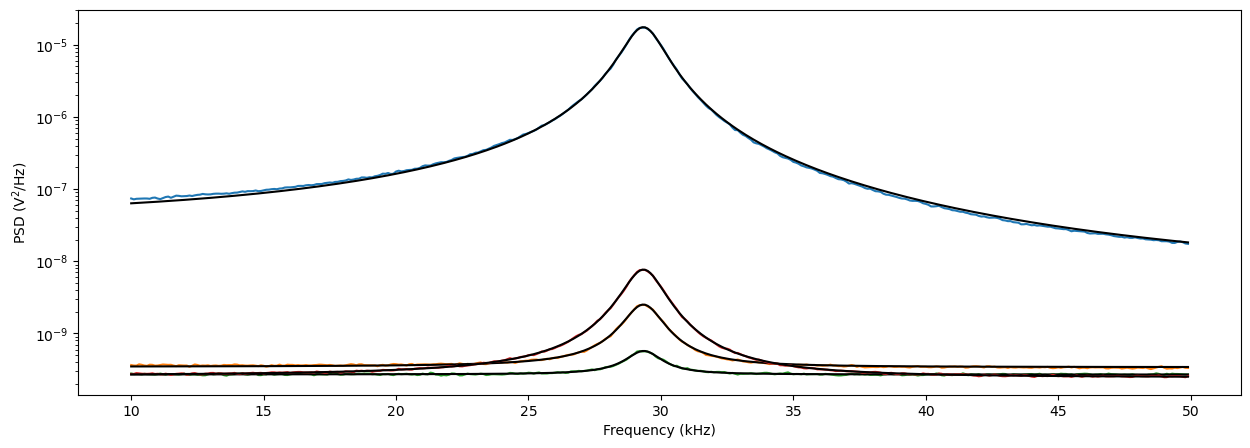

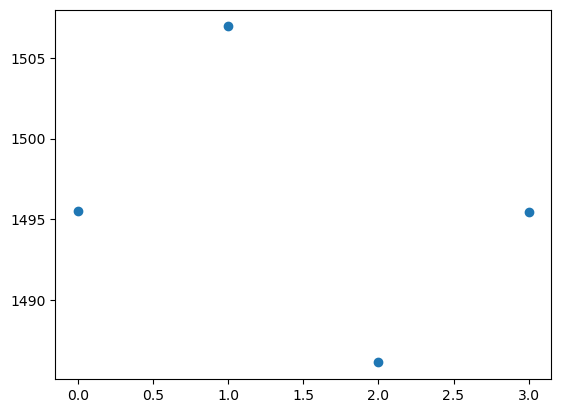

In [55]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(50000*nps_frac)
plt.plot(PSD_freq[lb:ub]/1000, PSDs[0][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[1][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted1[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[2][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted2[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[3][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted3[lb:ub], 'k')
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure()
plt.plot([fit[2], fit1[2], fit2[2], fit3[2]], 'o')

In [56]:
PSD = np.array([PSD_freq, PSDs[0]])

lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 160000, 10000, 7.0*10**(-9)])
fitted = au.triple_Linewidth2(PSD[0], *fit)

PSD = np.array([PSD_freq, PSDs[2]])
lb = int(100000*nps_frac)
ub = int(140000*nps_frac)
fit2, cov2 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 125000, 10000, 7.0*10**(-10)])
fitted2 = au.Linewidth2(PSD[0], *fit2)
print(fit[:3])
print(fit2[:3])

PSD = np.array([PSD_freq, PSDs[3]])
lb = int(100000*nps_frac)
ub = int(140000*nps_frac)
fit3, cov3 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 125000, 10000, 7.0*10**(-10)])
fitted3 = au.Linewidth2(PSD[0], *fit3)
print(fit[:3])
print(fit3[:3])

[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[7.47794437e+07 1.15999625e+05 2.08044138e+03]
[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[3.62566972e+07 1.16011428e+05 2.08781894e+03]


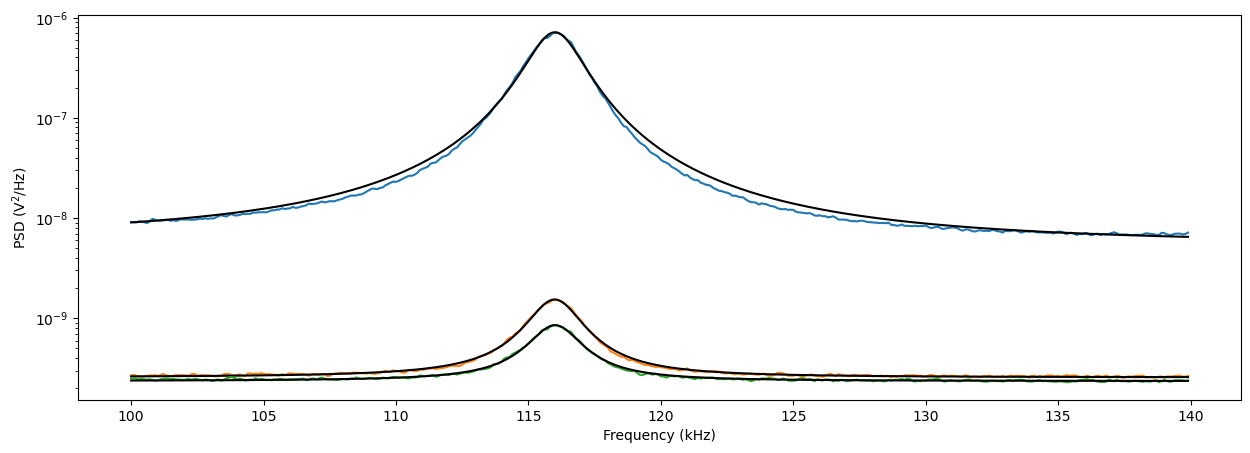

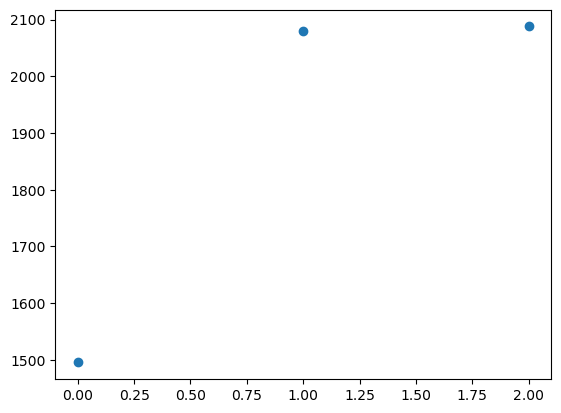

In [57]:
plt.figure(figsize = (15, 5))
lb = int(100000*nps_frac)
ub = int(140000*nps_frac)
plt.plot(PSD_freq[lb:ub]/1000, PSDs[0][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[2][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted2[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[3][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted3[lb:ub], 'k')
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure()
plt.plot([fit[2], fit2[2], fit3[2]], 'o')

In [60]:
PSD = np.array([PSD_freq, PSDs[0]])

lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 160000, 10000, 7.0*10**(-9)])
fitted = au.triple_Linewidth2(PSD[0], *fit)

PSD = np.array([PSD_freq, PSDs[1]])
lb = int(140000*nps_frac)
ub = int(190000*nps_frac)
fit1, cov1 = opt.curve_fit(au.Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**10, 160000, 10000, 7.0*10**(-10)])
fitted1 = au.Linewidth2(PSD[0], *fit1)
print(fit[:3])
print(fit1[:3])


[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[3.32345969e+08 1.59508514e+05 1.98140910e+03]
[3.37218791e+10 2.93563772e+04 1.49552028e+03]
[1.66036298e+09 1.57312985e+05 6.22944693e+04]


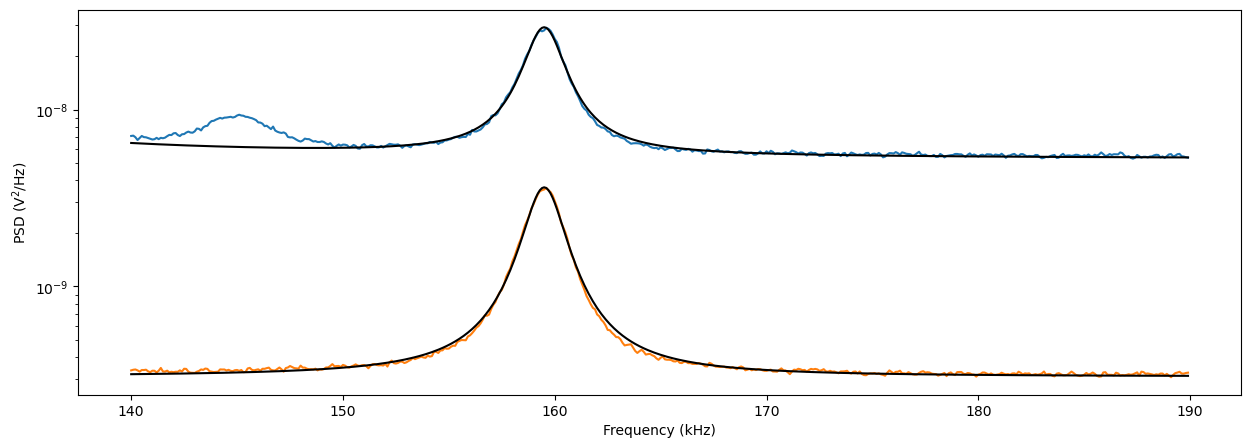

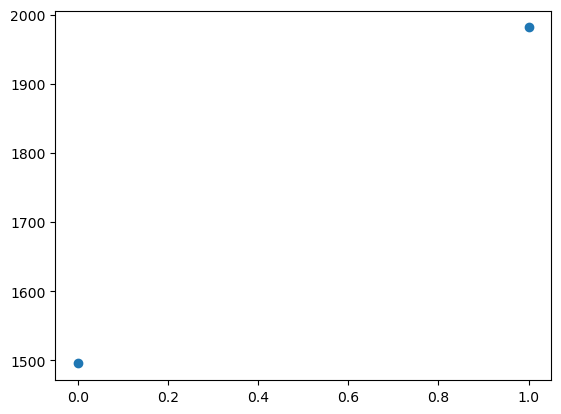

In [64]:
plt.figure(figsize = (15, 5))
lb = int(140000*nps_frac)
ub = int(190000*nps_frac)
plt.plot(PSD_freq[lb:ub]/1000, PSDs[0][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted[lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, PSDs[1][lb:ub])
plt.plot(PSD_freq[lb:ub]/1000, fitted1[lb:ub], 'k')
plt.yscale('log')
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure()
plt.plot([fit[2], fit1[2]], 'o')